In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the file
file_path = '/content/drive/MyDrive/sentiment-analysis-on-movie-reviews/train.tsv'  # Replace with the actual path
test_path = '/content/drive/MyDrive/sentiment-analysis-on-movie-reviews/test.tsv'
# Check if the file exists
if os.path.exists(file_path):
  print("train.tsv exists in Google Drive.")
else:
  print("train.tsv does not exist in Google Drive.")

if os.path.exists(test_path):
  print("test.tsv exists in Google Drive.")
else:
  print("test.tsv does not exist in Google Drive.")

Mounted at /content/drive
train.tsv exists in Google Drive.
test.tsv exists in Google Drive.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sentiment-analysis-on-movie-reviews/train.tsv/train.tsv', sep='\t')
df_test = pd.read_csv('/content/drive/MyDrive/sentiment-analysis-on-movie-reviews/test.tsv/test.tsv', sep='\t')

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


PhraseId     SentenceId      Sentiment
count  156060.000000  156060.000000  156060.000000
mean    78030.500000    4079.732744       2.063578
std     45050.785842    2502.764394       0.893832
min         1.000000       1.000000       0.000000
25%     39015.750000    1861.750000       2.000000
50%     78030.500000    4017.000000       2.000000
75%    117045.250000    6244.000000       3.000000
max    156060.000000    8544.000000       4.000000

In [ ]:
df_test.info()
df_test.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66291 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


PhraseId    SentenceId
count   66292.00000  66292.000000
mean   189206.50000  10114.909144
std     19136.99636    966.787807
min    156061.00000   8545.000000
25%    172633.75000   9266.000000
50%    189206.50000  10086.000000
75%    205779.25000  10941.000000
max    222352.00000  11855.000000

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  
PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64
Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64


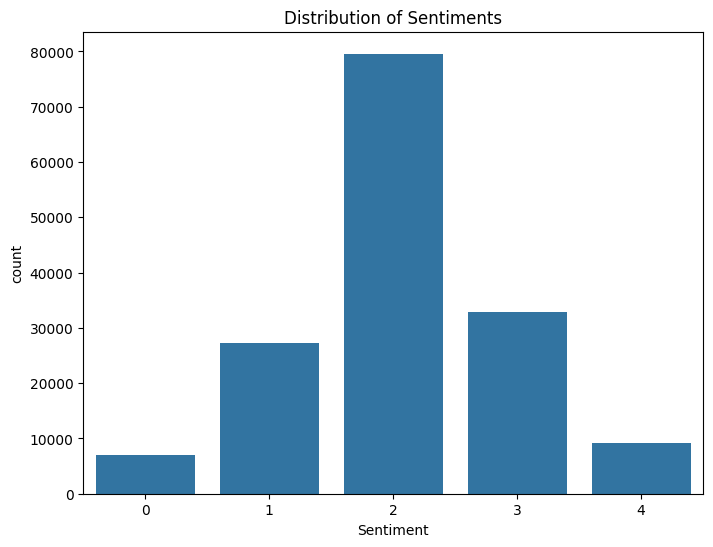

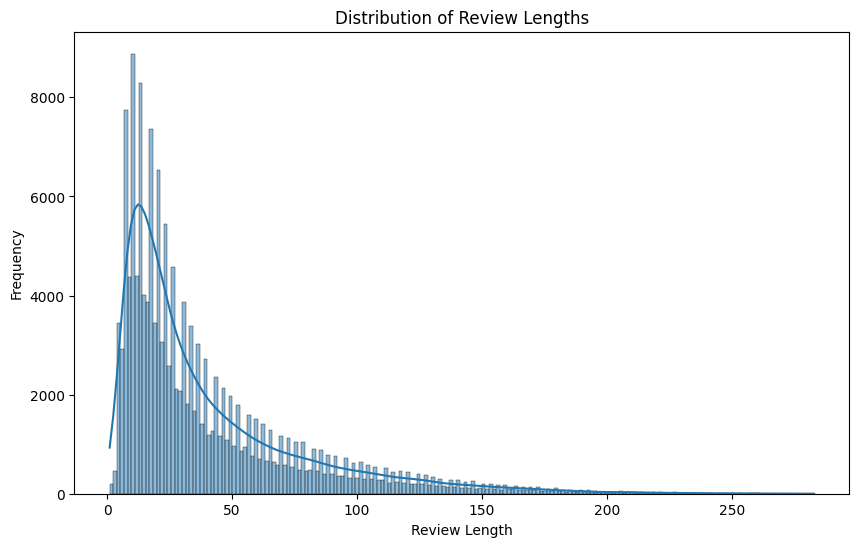

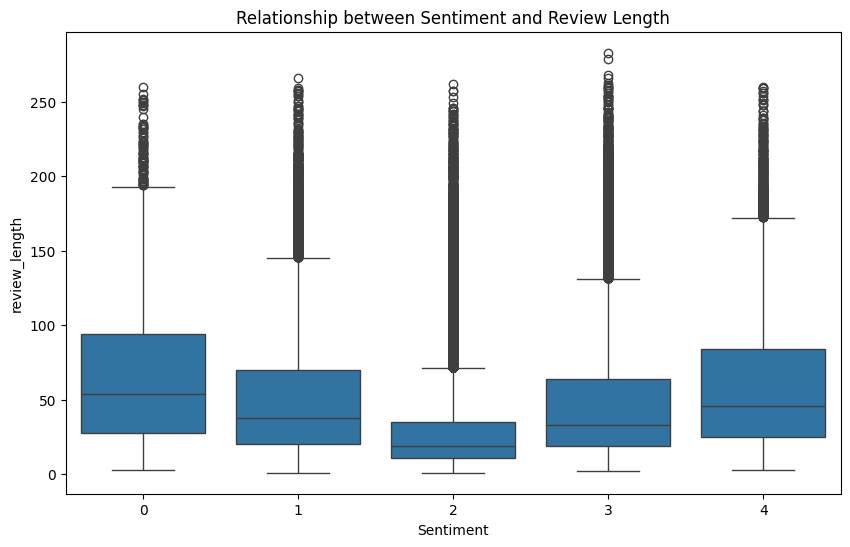

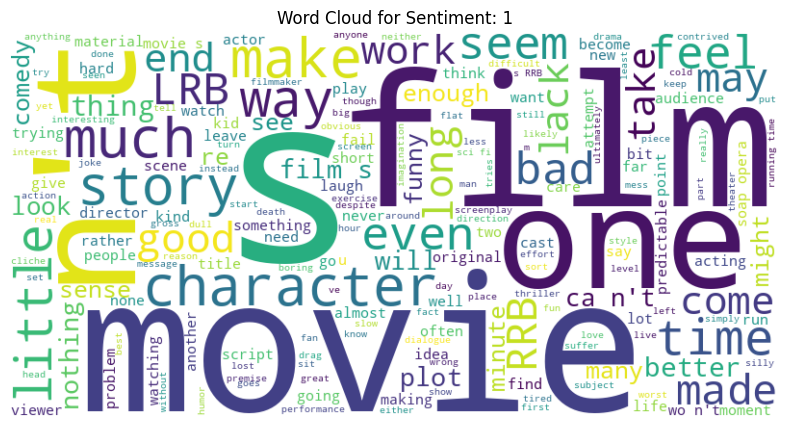

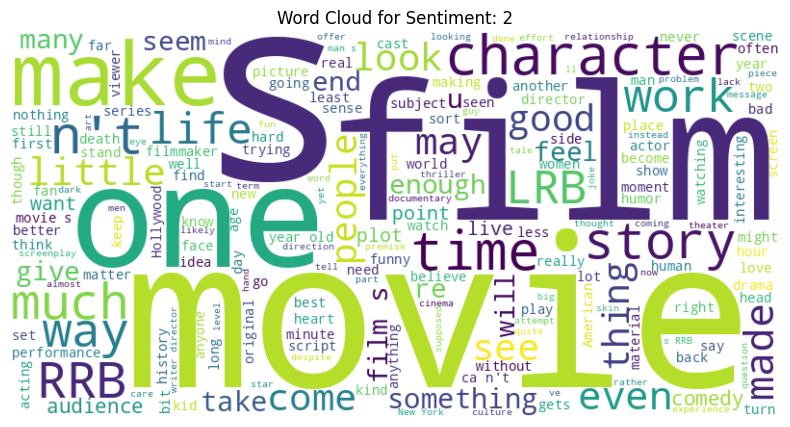

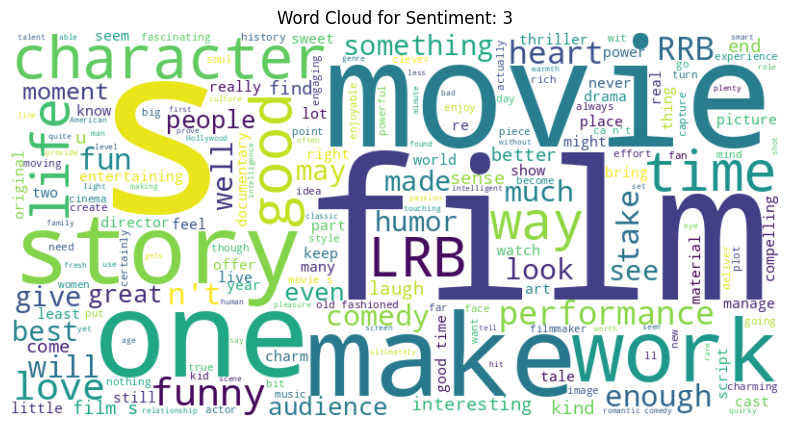

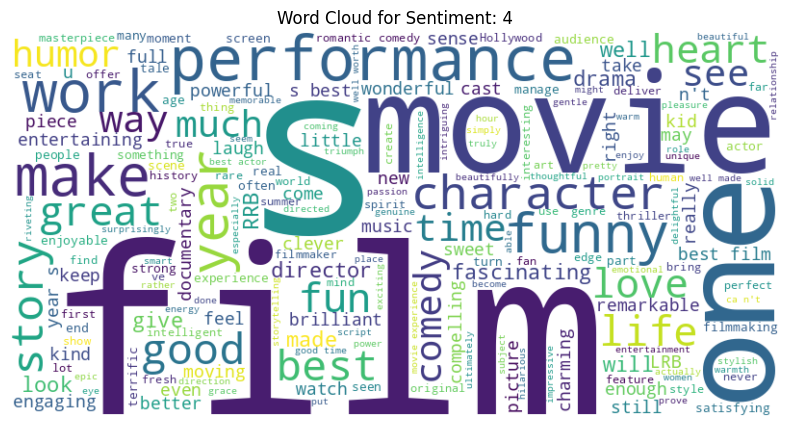

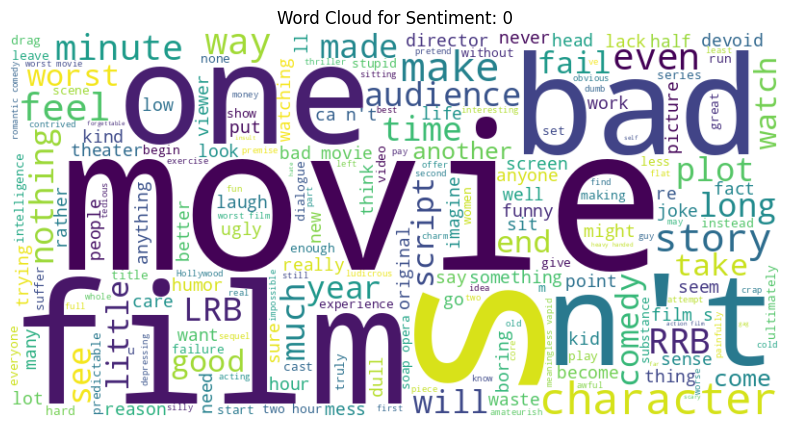

In [ ]:

import matplotlib.pyplot as plt
# Display the first few rows of the DataFrame
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Explore the distribution of the 'Sentiment' column
print(df['Sentiment'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Analyze the length of the reviews
df['review_length'] = df['Phrase'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Explore the relationship between sentiment and review length
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='review_length', data=df)
plt.title('Relationship between Sentiment and Review Length')
plt.show()

# Word Cloud Visualization (requires wordcloud library)
#!pip install wordcloud
from wordcloud import WordCloud

# Combine all phrases for each sentiment
sentiments = df['Sentiment'].unique()
for sentiment in sentiments:
  text = ' '.join(df[df['Sentiment'] == sentiment]['Phrase'].astype(str))
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(f"Word Cloud for Sentiment: {sentiment}")
  plt.show()


Before resampling: Counter({2: 79582, 3: 32927, 1: 27273, 4: 9206, 0: 7072})
                                                   Phrase  Sentiment
115485  It 's hard to imagine any recent film , indepe...          0
72448                      as a numbingly dull experience          0
101189  by its predictable plot and paper-thin support...          0
85027   I found it slow , predictable and not very amu...          0
91836                                              pissed          0
Phrase       0
Sentiment    0
dtype: int64
Sentiment
1    8000
2    8000
3    8000
4    8000
0    7072
Name: count, dtype: int64


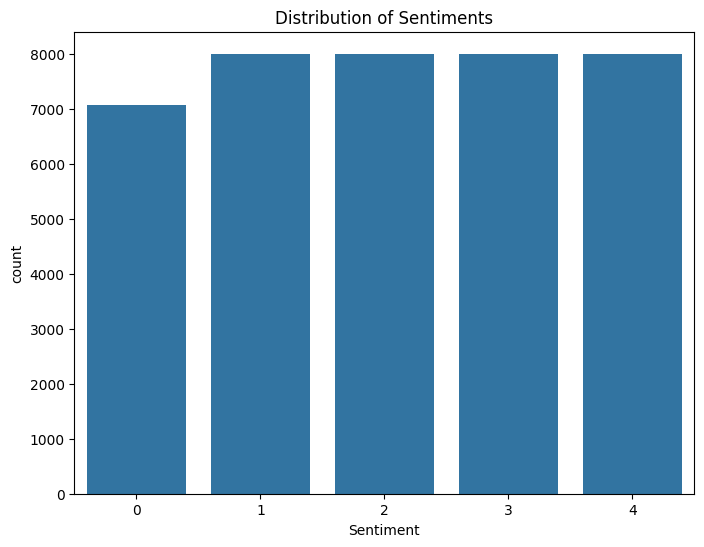

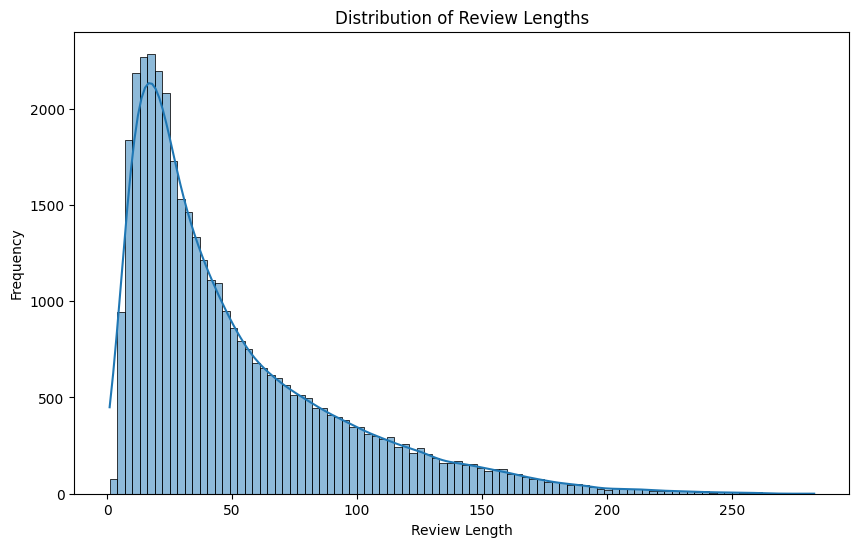

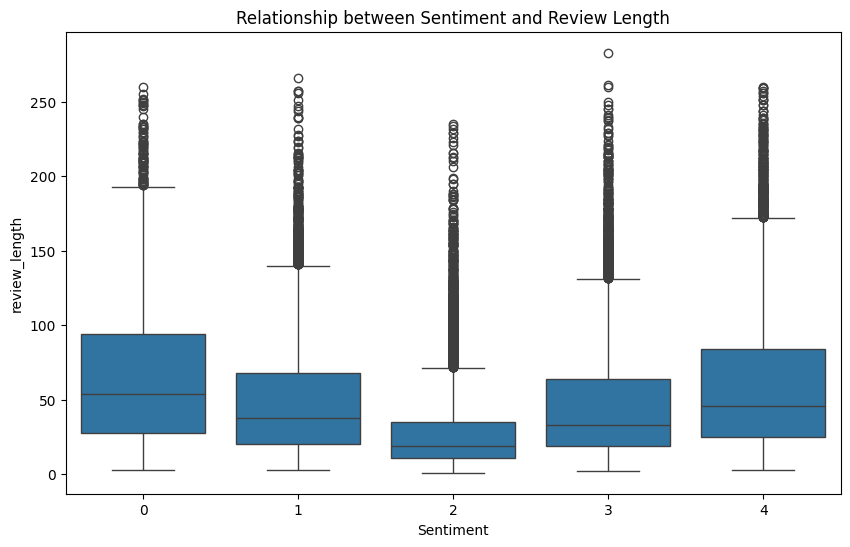

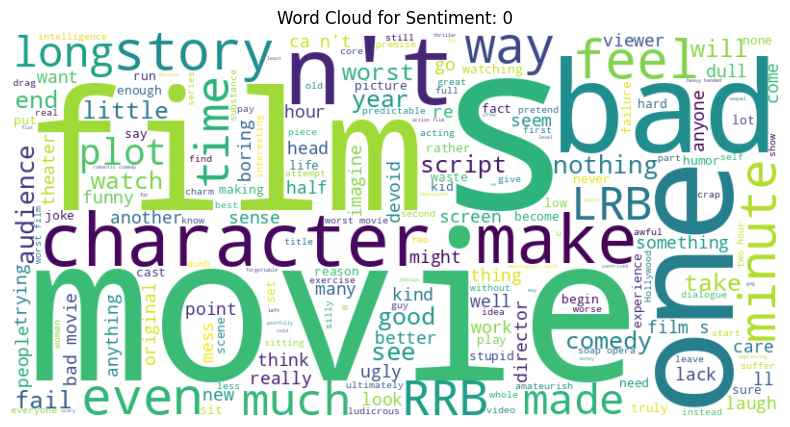

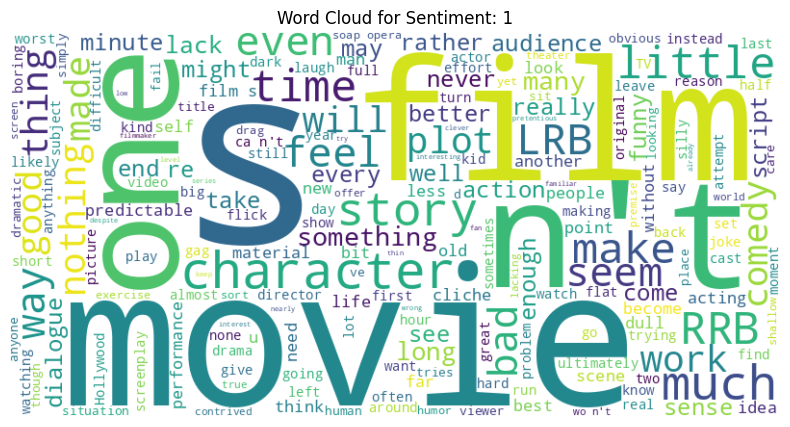

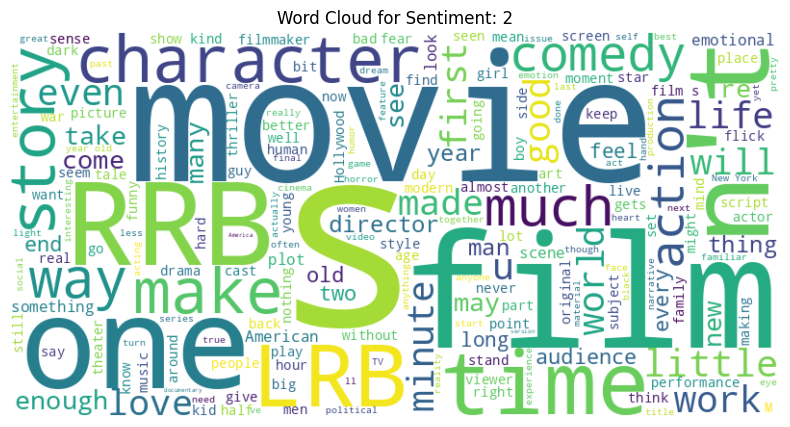

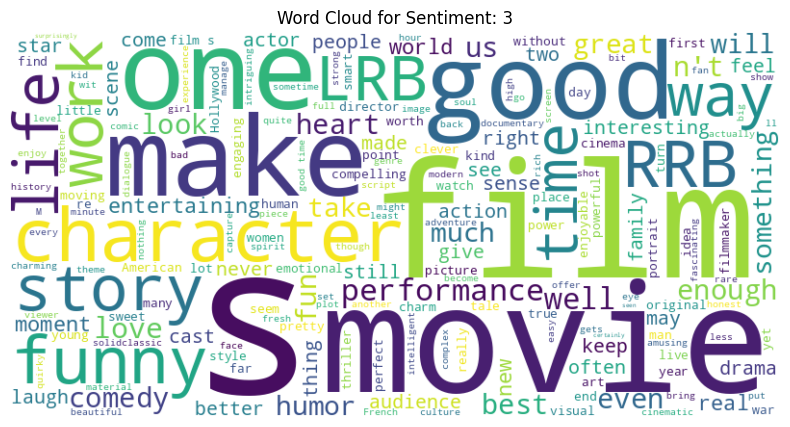

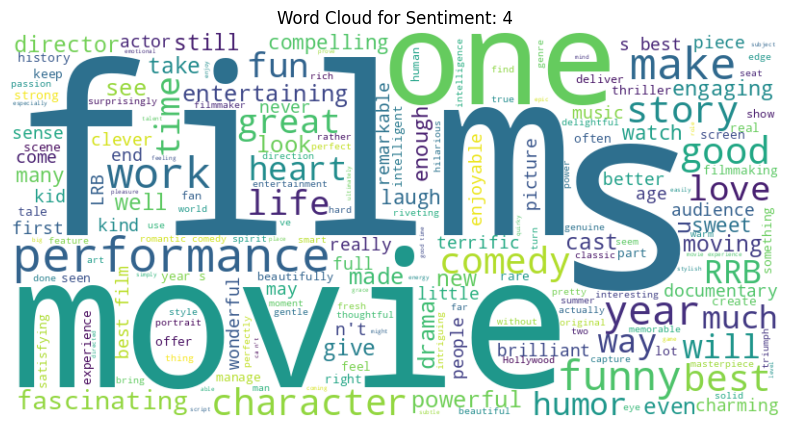

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Count current class distribution
class_counts = Counter(df["Sentiment"])
print("Before resampling:", class_counts)

# Define desired number of samples per class
sampling_strategy = {cls: min(8000, count) for cls, count in class_counts.items()}

rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)  # Reduce the majority class to 20% of its original size
X_resampled, y_resampled = rus.fit_resample(df[["Phrase"]], df["Sentiment"])

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=["Phrase"])
df_resampled["Sentiment"] = y_resampled  # Add labels back

df = df_resampled

import matplotlib.pyplot as plt
# Display the first few rows of the DataFrame
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Explore the distribution of the 'Sentiment' column
print(df['Sentiment'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Analyze the length of the reviews
df['review_length'] = df['Phrase'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Explore the relationship between sentiment and review length
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='review_length', data=df)
plt.title('Relationship between Sentiment and Review Length')
plt.show()

# Word Cloud Visualization (requires wordcloud library)
#!pip install wordcloud
from wordcloud import WordCloud

# Combine all phrases for each sentiment
sentiments = df['Sentiment'].unique()
for sentiment in sentiments:
  text = ' '.join(df[df['Sentiment'] == sentiment]['Phrase'].astype(str))
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(f"Word Cloud for Sentiment: {sentiment}")
  plt.show()


In [ ]:
# Inference from EDA:

# 1. Sentiment Distribution: The dataset exhibits an uneven distribution of sentiments, with certain sentiments being more prevalent than others.  This imbalance might need to be addressed during model training (e.g., using techniques like oversampling or class weights).

# 2. Review Length Variation:  Review lengths vary significantly.  Shorter reviews might offer less context, while extremely long reviews could introduce noise. Feature engineering might benefit from incorporating review length as a feature or experimenting with different text truncation/padding strategies.  The relationship between sentiment and review length, as shown in the box plots, could suggest further investigation.  For example, are longer reviews associated with more extreme sentiment scores?

# 3. Word Clouds: Word clouds provide a visual representation of the most frequent words associated with each sentiment. This can offer insights into the vocabulary and themes related to each sentiment.  For example, positive sentiment reviews may have words like "great," "excellent," and "wonderful," while negative reviews may contain words like "bad," "terrible," and "awful."  Further analysis of the word clouds can inform feature engineering (e.g., creating features based on the presence of specific words or word combinations).  Note that very frequent words (e.g., stop words) may dominate the word clouds and might not provide meaningful insights.


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')  # This is required for word_tokenize()
nltk.download('averaged_perceptron_tagger')  # Required for POS tagging
nltk.download('punkt_tab')  # This is required for word_tokenize()
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Sentiment' is your target variable
df_1 = df.copy()
X = df_1.drop('Sentiment', axis=1)  # Features (all columns except 'Sentiment')
y = df['Sentiment']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state for reproducibility

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (31257, 2)
X_test shape: (7815, 2)
y_train shape: (31257,)
y_test shape: (7815,)


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and stem
    processed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(processed_tokens)


X_train['Phrase'] = X_train['Phrase'].apply(preprocess_text)
X_test['Phrase'] = X_test['Phrase'].apply(preprocess_text)


In [ ]:
import re
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

stemmer = SnowballStemmer('english')
english_stopwords = stopwords.words('english')


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(tokenizer =lambda text:[stemmer.stem(token) for token in word_tokenize(text) if token not in english_stopwords[:115]],
                            stop_words=english_stopwords[:115],
                            ngram_range=(1,2),max_features=5000)  # Limit features for efficiency
X_train_vec = vectorizer.fit_transform(X_train['Phrase'])
X_test_vec = vectorizer.transform(X_test['Phrase'])

# Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000) # Increased max_iter
model.fit(X_train_vec, y_train)

# Prediction
y_pred_prior = model.predict(X_test_vec)

# Evaluation
print(classification_report(y_test, y_pred_prior))


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'could', 'might', 'must', "n't", 'need', 've'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.60      0.57      0.59      1451
           1       0.41      0.37      0.39      1609
           2       0.46      0.55      0.50      1570
           3       0.41      0.36      0.38      1571
           4       0.64      0.66      0.65      1614

    accuracy                           0.50      7815
   macro avg       0.50      0.50      0.50      7815
weighted avg       0.50      0.50      0.50      7815



In [ ]:
X_train_vec.shape

(31257, 5000)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Model Training (Multinomial Naive Bayes)
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Prediction
nb_y_pred = nb_model.predict(X_test_vec)

# Evaluation
print(classification_report(y_test, nb_y_pred))


              precision    recall  f1-score   support

           0       0.58      0.49      0.53      1451
           1       0.40      0.40      0.40      1609
           2       0.41      0.44      0.42      1570
           3       0.39      0.37      0.38      1571
           4       0.57      0.64      0.60      1614

    accuracy                           0.47      7815
   macro avg       0.47      0.47      0.47      7815
weighted avg       0.47      0.47      0.47      7815



In [ ]:
#ASSIGNMENT 2

from sklearn.decomposition import TruncatedSVD

# Apply TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=1000)  # Reduce from 5000 to 1000 components
X_train_svd = svd.fit_transform(X_train_vec)
X_test_svd = svd.transform(X_test_vec)

# Train a new Logistic Regression model with reduced features
model_svd = LogisticRegression(max_iter=1000)
model_svd.fit(X_train_svd, y_train)

# Prediction with reduced features
y_pred_svd = model_svd.predict(X_test_svd)

# Evaluate the model with reduced features
print(classification_report(y_test, y_pred_svd))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53      1451
           1       0.38      0.32      0.34      1609
           2       0.42      0.58      0.49      1570
           3       0.39      0.32      0.36      1571
           4       0.61      0.64      0.62      1614

    accuracy                           0.47      7815
   macro avg       0.47      0.47      0.47      7815
weighted avg       0.47      0.47      0.47      7815



In [ ]:

import numpy as np
from sklearn.utils import resample

def create_bootstrap_sample(X, y):
    """Creates a bootstrap sample with equal class representation."""

    y = np.array(y)  # Convert y to numpy array if it's a Pandas Series
    class_samples = []
    class_labels = np.unique(y)

    for class_label in class_labels:
        class_indices = np.where(y == class_label)[0]
        class_samples.append(X[class_indices])

    min_class_size = min(len(samples) for samples in class_samples)

    bootstrap_X, bootstrap_y = [], []

    for i, samples in enumerate(class_samples):
        indices = np.where(y == class_labels[i])[0]
        X_resampled, y_resampled = resample(samples, y[indices],n_samples=min_class_size)
        bootstrap_X.append(X_resampled)
        bootstrap_y.extend(y_resampled)

    return np.concatenate(bootstrap_X), np.array(bootstrap_y)

# Example usage (assuming X_train_svd and y_train are defined)
# X_sample_train, y_sample_train = create_bootstrap_sample(X_train_svd, y_train)
# X_sample_test, y_sample_test = create_bootstrap_sample(X_test_svd, y_test)
# print(X_sample_train.shape, y_sample_train.shape)
# print(X_sample_test.shape, y_sample_test.shape)


In [ ]:
"""from sklearn.utils import resample
X_sample_train, y_sample_train = resample(X_train_svd, y_train, replace=True, n_samples=16000, random_state=42)
X_sample_test, y_sample_test = resample(X_test_svd, y_test, replace=True, n_samples=4000, random_state=42)
print("X_sample_train: ",X_sample_train.shape)
print("X_sample_test: ",X_sample_test.shape)
print("y_sample_train: ",y_sample_train.shape)
print("y_sample_test: ",y_sample_test.shape)"""

'from sklearn.utils import resample\nX_sample_train, y_sample_train = resample(X_train_svd, y_train, replace=True, n_samples=16000, random_state=42)\nX_sample_test, y_sample_test = resample(X_test_svd, y_test, replace=True, n_samples=4000, random_state=42)\nprint("X_sample_train: ",X_sample_train.shape)\nprint("X_sample_test: ",X_sample_test.shape)\nprint("y_sample_train: ",y_sample_train.shape)\nprint("y_sample_test: ",y_sample_test.shape)'

In [ ]:
#before dimensionality reduction
from sklearn.neighbors import KNeighborsClassifier

# Model Training (K-Nearest Neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_vec, y_train)

# Prediction
knn_y_pred = knn_model.predict(X_test_vec)

# Evaluation
print(classification_report(y_test, knn_y_pred))


              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1451
           1       0.37      0.35      0.36      1609
           2       0.35      0.58      0.44      1570
           3       0.39      0.26      0.31      1571
           4       0.69      0.48      0.56      1614

    accuracy                           0.45      7815
   macro avg       0.47      0.45      0.45      7815
weighted avg       0.47      0.45      0.45      7815



In [ ]:
#after dimensionality reduction
from sklearn.neighbors import KNeighborsClassifier

# Model Training (K-Nearest Neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_svd, y_train)

# Prediction
knn_y_pred = knn_model.predict(X_test_svd)

# Evaluation
print(classification_report(y_test, knn_y_pred))


              precision    recall  f1-score   support

           0       0.55      0.56      0.55      1451
           1       0.33      0.44      0.38      1609
           2       0.33      0.39      0.36      1570
           3       0.38      0.30      0.34      1571
           4       0.69      0.47      0.56      1614

    accuracy                           0.43      7815
   macro avg       0.46      0.43      0.44      7815
weighted avg       0.45      0.43      0.43      7815



In [ ]:
# varying hyperparameters for LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
C_values = [0.1, 1, 10]
penalty_values = ['l1', 'l2', 'elasticnet']
solver_values = ['lbfgs', 'liblinear', 'saga']

dict_score = {}
best_model = None
best_score = 0
best_params = ""

# Perform Grid Search
for C in C_values:
    for penalty in penalty_values:
        for solver in solver_values:
            if C == 10 and solver == 'liblinear':
                break
            if (penalty in ['l1', 'elasticnet'] and solver == "lbfgs"):
                continue
            if (solver in ['lbfgs', 'liblinear'] and penalty == "elasticnet"):
                continue

            # Specify l1_ratio if penalty is elasticnet
            l1_ratio = None
            if penalty == 'elasticnet':
                l1_ratio = 0.5  # You can change this ratio as needed

            print(f"Training with C={C}, penalty={penalty}, solver={solver}")
            model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, l1_ratio=l1_ratio)
            model.fit(X_train_svd, y_train)
            y_pred = model.predict(X_test_svd)
            acc = accuracy_score(y_test, y_pred)
            print(classification_report(y_test, y_pred))
            # Store results
            param_key = f"C={C}, penalty={penalty}, solver={solver}"
            dict_score[param_key] = acc

            # Update best model
            if acc > best_score:
                best_score = acc
                best_model = model
                best_params = param_key

# Print best model's performance
print(f"\nBest Model: {best_params} with Accuracy: {best_score:.4f}")
print(classification_report(y_test, best_model.predict(X_test_svd)))


Training with C=0.1, penalty=l1, solver=liblinear
              precision    recall  f1-score   support

           0       0.47      0.33      0.39      1451
           1       0.31      0.19      0.23      1609
           2       0.32      0.65      0.43      1570
           3       0.30      0.10      0.15      1571
           4       0.48      0.61      0.54      1614

    accuracy                           0.38      7815
   macro avg       0.38      0.38      0.35      7815
weighted avg       0.37      0.38      0.35      7815

Training with C=0.1, penalty=l1, solver=saga
              precision    recall  f1-score   support

           0       0.48      0.36      0.41      1451
           1       0.32      0.18      0.23      1609
           2       0.32      0.63      0.42      1570
           3       0.30      0.14      0.19      1571
           4       0.48      0.59      0.53      1614

    accuracy                           0.38      7815
   macro avg       0.38      0.38   

In [ ]:
# Varying hyperparameter (k) for KNN
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,11):
  print("K : ",i*3)
  X_sample_train, y_sample_train = create_bootstrap_sample(X_train_svd, y_train)
  # Model Training (K-Nearest Neighbors)
  knn_model = KNeighborsClassifier(n_neighbors=i*3)  # You can adjust the number of neighbors
  knn_model.fit(X_train_svd, y_train)

  # Prediction
  knn_y_pred = knn_model.predict(X_test_svd)

  # Evaluation
  print(classification_report(y_test, knn_y_pred))


K :  3
              precision    recall  f1-score   support

           0       0.52      0.62      0.56      1451
           1       0.31      0.44      0.36      1609
           2       0.34      0.35      0.35      1570
           3       0.39      0.25      0.31      1571
           4       0.72      0.53      0.61      1614

    accuracy                           0.43      7815
   macro avg       0.46      0.44      0.44      7815
weighted avg       0.46      0.43      0.44      7815

K :  6
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1451
           1       0.32      0.44      0.37      1609
           2       0.31      0.38      0.34      1570
           3       0.37      0.27      0.31      1571
           4       0.70      0.46      0.55      1614

    accuracy                           0.42      7815
   macro avg       0.45      0.42      0.43      7815
weighted avg       0.45      0.42      0.42      7815

K :  9
 

In [ ]:
'''
#C=10;penalty=l1;solver=liblinear;
model = LogisticRegression(C=10, penalty=penalty[1], solver=solver[0], max_iter=1000)
model.fit(X_train_svd, y_train)
y_pred = model.predict(X_test_svd)
print(classification_report(y_test, y_pred))
str_key = "C=10;penalty=l2;solver=liblinear"
dict_score[str_key] = accuracy_score(y_test, y_pred)
'''

In [ ]:
'''
#C=10;penalty=l1;solver=liblinear;
model = LogisticRegression(C=10, penalty=penalty[0], solver=solver[0], max_iter=1000)
model.fit(X_train_svd, y_train)
y_pred = model.predict(X_test_svd)
print(classification_report(y_test, y_pred))
str_key = "C=10;penalty=l2;solver=saga"
dict_score[str_key] = accuracy_score(y_test, y_pred)
'''

In [ ]:
for i in dict_score:
  print(i," => ", dict_score[i])

C=0.1,penalty=l1,solver=liblinear  =>  0.5437331795463284
C=0.1,penalty=l1,solver=saga  =>  0.5496924259900039
C=0.1,penalty=l2,solver=liblinear  =>  0.5465205690119185
C=0.1,penalty=l2,solver=saga  =>  0.5578943995899013
C=1,penalty=l1,solver=liblinear  =>  0.577117775214661
C=1,penalty=l1,solver=saga  =>  0.5804177880302448
C=1,penalty=l2,solver=liblinear  =>  0.5753235934896834
C=1,penalty=l2,solver=saga  =>  0.580642060745867
C=10;penalty=l1;solver=liblinear  =>  0.5793284634115083


In [ ]:
'''
print("Table\nModel : Logistic Regression (Accuracy scores)")
print("Prior to tuning : ",accuracy_score(y_test, y_pred_prior))
print("After tuning (dimensionality reduction : 4000 to 1000 columns): ",accuracy_score(y_test,y_pred_svd))
print("After finding optimal parameter (C=10;penalty=l1;solver=liblinear): ",dict_score["C=10;penalty=l1;solver=liblinear"])
'''

Table
Model : Logistic Regression (Accuracy scores)
Prior to tuning :  0.6236383442265795
After tuning (dimensionality reduction : 4000 to 1000 columns):  0.5808342945021145
After finding optimal parameter (C=10;penalty=l1;solver=liblinear):  0.5793284634115083


In [ ]:
#Ensemble Techniques

In [ ]:
'''
# prompt: develop a ensemble model

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score
# Assuming you have trained the following models:
# model (Logistic Regression)
# nb_model (Multinomial Naive Bayes)
# model_svd (Logistic Regression with SVD)
# knn_model (K-Nearest Neighbors)


# Create a voting classifier with soft voting
for i in range(10):
  print("Iteration : ",i+1)
  X_sample_train, y_sample_train = create_bootstrap_sample(X_train_svd, y_train)
  X_sample_test, y_sample_test = create_bootstrap_sample(X_test_svd, y_test)
  ensemble_model = VotingClassifier(estimators=[
      ('lr', model),
      ('lr_svd', model_svd),
      ('knn', knn_model)
  ], voting='soft')  # Use 'hard' for hard voting
Untitled0.ipynb_
Files
..
Drop files to upload them to session storage.


from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the file
file_path = '/content/drive/MyDrive/sentiment-analysis-on-movie-reviews/train.tsv'  # Replace with the actual path
test_path = '/content/drive/MyDrive/sentiment-analysis-on-movie-reviews/test.tsv'
# Check if the file exists
if os.path.exists(file_path):
  print("train.tsv exists in Google Drive.")
else:
  print("train.tsv does not exist in Google Drive.")

if os.path.exists(test_path):
  print("test.tsv exists in Google Drive.")
else:
  print("test.tsv does not exist in Google Drive.")

Mounted at /content/drive
train.tsv exists in Google Drive.
test.tsv exists in Google Drive.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/sentiment-analysis-on-movie-reviews/train.tsv/train.tsv', sep='\t')
df_test = pd.read_csv('/content/drive/MyDrive/sentiment-analysis-on-movie-reviews/test.tsv/test.tsv', sep='\t')

df.info()
df.describe()

df_test.info()
df_test.describe()


import matplotlib.pyplot as plt
# Display the first few rows of the DataFrame
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Explore the distribution of the 'Sentiment' column
print(df['Sentiment'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Analyze the length of the reviews
df['review_length'] = df['Phrase'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Explore the relationship between sentiment and review length
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='review_length', data=df)
plt.title('Relationship between Sentiment and Review Length')
plt.show()

# Word Cloud Visualization (requires wordcloud library)
#!pip install wordcloud
from wordcloud import WordCloud

# Combine all phrases for each sentiment
sentiments = df['Sentiment'].unique()
for sentiment in sentiments:
  text = ' '.join(df[df['Sentiment'] == sentiment]['Phrase'].astype(str))
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(f"Word Cloud for Sentiment: {sentiment}")
  plt.show()

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Count current class distribution
class_counts = Counter(df["Sentiment"])
print("Before resampling:", class_counts)

# Define desired number of samples per class
sampling_strategy = {cls: min(8000, count) for cls, count in class_counts.items()}

rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)  # Reduce the majority class to 20% of its original size
X_resampled, y_resampled = rus.fit_resample(df[["Phrase"]], df["Sentiment"])

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=["Phrase"])
df_resampled["Sentiment"] = y_resampled  # Add labels back

df = df_resampled

import matplotlib.pyplot as plt
# Display the first few rows of the DataFrame
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Explore the distribution of the 'Sentiment' column
print(df['Sentiment'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Analyze the length of the reviews
df['review_length'] = df['Phrase'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Explore the relationship between sentiment and review length
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='review_length', data=df)
plt.title('Relationship between Sentiment and Review Length')
plt.show()

# Word Cloud Visualization (requires wordcloud library)
#!pip install wordcloud
from wordcloud import WordCloud

# Combine all phrases for each sentiment
sentiments = df['Sentiment'].unique()
for sentiment in sentiments:
  text = ' '.join(df[df['Sentiment'] == sentiment]['Phrase'].astype(str))
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(f"Word Cloud for Sentiment: {sentiment}")
  plt.show()

# Inference from EDA:

# 1. Sentiment Distribution: The dataset exhibits an uneven distribution of sentiments, with certain sentiments being more prevalent than others.  This imbalance might need to be addressed during model training (e.g., using techniques like oversampling or class weights).

# 2. Review Length Variation:  Review lengths vary significantly.  Shorter reviews might offer less context, while extremely long reviews could introduce noise. Feature engineering might benefit from incorporating review length as a feature or experimenting with different text truncation/padding strategies.  The relationship between sentiment and review length, as shown in the box plots, could suggest further investigation.  For example, are longer reviews associated with more extreme sentiment scores?

# 3. Word Clouds: Word clouds provide a visual representation of the most frequent words associated with each sentiment. This can offer insights into the vocabulary and themes related to each sentiment.  For example, positive sentiment reviews may have words like "great," "excellent," and "wonderful," while negative reviews may contain words like "bad," "terrible," and "awful."  Further analysis of the word clouds can inform feature engineering (e.g., creating features based on the presence of specific words or word combinations).  Note that very frequent words (e.g., stop words) may dominate the word clouds and might not provide meaningful insights.

import nltk
nltk.download('stopwords')
nltk.download('punkt')  # This is required for word_tokenize()
nltk.download('averaged_perceptron_tagger')  # Required for POS tagging
nltk.download('punkt_tab')  # This is required for word_tokenize()
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.

True

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Sentiment' is your target variable
df_1 = df.copy()
X = df_1.drop('Sentiment', axis=1)  # Features (all columns except 'Sentiment')
y = df['Sentiment']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state for reproducibility

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (31257, 2)
X_test shape: (7815, 2)
y_train shape: (31257,)
y_test shape: (7815,)

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and stem
    processed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(processed_tokens)


X_train['Phrase'] = X_train['Phrase'].apply(preprocess_text)
X_test['Phrase'] = X_test['Phrase'].apply(preprocess_text)

import re
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

stemmer = SnowballStemmer('english')
english_stopwords = stopwords.words('english')


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(tokenizer =lambda text:[stemmer.stem(token) for token in word_tokenize(text) if token not in english_stopwords[:115]],
                            stop_words=english_stopwords[:115],
                            ngram_range=(1,2),max_features=5000)  # Limit features for efficiency
X_train_vec = vectorizer.fit_transform(X_train['Phrase'])
X_test_vec = vectorizer.transform(X_test['Phrase'])

# Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000) # Increased max_iter
model.fit(X_train_vec, y_train)

# Prediction
y_pred_prior = model.predict(X_test_vec)

# Evaluation
print(classification_report(y_test, y_pred_prior))

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'could', 'might', 'must', "n't", 'need', 've'] not in stop_words.
  warnings.warn(

              precision    recall  f1-score   support

           0       0.60      0.57      0.59      1451
           1       0.41      0.37      0.39      1609
           2       0.46      0.55      0.50      1570
           3       0.41      0.36      0.38      1571
           4       0.64      0.66      0.65      1614

    accuracy                           0.50      7815
   macro avg       0.50      0.50      0.50      7815
weighted avg       0.50      0.50      0.50      7815

X_train_vec.shape

(31257, 5000)

              precision    recall  f1-score   support

           0       0.58      0.49      0.53      1451
           1       0.40      0.40      0.40      1609
           2       0.41      0.44      0.42      1570
           3       0.39      0.37      0.38      1571
           4       0.57      0.64      0.60      1614

    accuracy                           0.47      7815
   macro avg       0.47      0.47      0.47      7815
weighted avg       0.47      0.47      0.47      7815

              precision    recall  f1-score   support

           0       0.56      0.50      0.53      1451
           1       0.38      0.32      0.34      1609
           2       0.42      0.58      0.49      1570
           3       0.39      0.32      0.36      1571
           4       0.61      0.64      0.62      1614

    accuracy                           0.47      7815
   macro avg       0.47      0.47      0.47      7815
weighted avg       0.47      0.47      0.47      7815


import numpy as np
from sklearn.utils import resample

def create_bootstrap_sample(X, y):
    """Creates a bootstrap sample with equal class representation."""

    y = np.array(y)  # Convert y to numpy array if it's a Pandas Series
    class_samples = []
    class_labels = np.unique(y)

    for class_label in class_labels:
        class_indices = np.where(y == class_label)[0]
        class_samples.append(X[class_indices])

    min_class_size = min(len(samples) for samples in class_samples)

    bootstrap_X, bootstrap_y = [], []

    for i, samples in enumerate(class_samples):
        indices = np.where(y == class_labels[i])[0]
        X_resampled, y_resampled = resample(samples, y[indices],n_samples=min_class_size)
        bootstrap_X.append(X_resampled)
        bootstrap_y.extend(y_resampled)

    return np.concatenate(bootstrap_X), np.array(bootstrap_y)

# Example usage (assuming X_train_svd and y_train are defined)
# X_sample_train, y_sample_train = create_bootstrap_sample(X_train_svd, y_train)
# X_sample_test, y_sample_test = create_bootstrap_sample(X_test_svd, y_test)
# print(X_sample_train.shape, y_sample_train.shape)
# print(X_sample_test.shape, y_sample_test.shape)

"""from sklearn.utils import resample
X_sample_train, y_sample_train = resample(X_train_svd, y_train, replace=True, n_samples=16000, random_state=42)
X_sample_test, y_sample_test = resample(X_test_svd, y_test, replace=True, n_samples=4000, random_state=42)
print("X_sample_train: ",X_sample_train.shape)
print("X_sample_test: ",X_sample_test.shape)
print("y_sample_train: ",y_sample_train.shape)
print("y_sample_test: ",y_sample_test.shape)"""

#before dimensionality reduction
from sklearn.neighbors import KNeighborsClassifier

# Model Training (K-Nearest Neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_vec, y_train)

# Prediction
knn_y_pred = knn_model.predict(X_test_vec)

# Evaluation
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1451
           1       0.37      0.35      0.36      1609
           2       0.35      0.58      0.44      1570
           3       0.39      0.26      0.31      1571
           4       0.69      0.48      0.56      1614

    accuracy                           0.45      7815
   macro avg       0.47      0.45      0.45      7815
weighted avg       0.47      0.45      0.45      7815

#after dimensionality reduction
from sklearn.neighbors import KNeighborsClassifier

# Model Training (K-Nearest Neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_svd, y_train)

# Prediction
knn_y_pred = knn_model.predict(X_test_svd)

# Evaluation
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55      1451
           1       0.33      0.44      0.38      1609
           2       0.33      0.39      0.36      1570
           3       0.38      0.30      0.34      1571
           4       0.69      0.47      0.56      1614

    accuracy                           0.43      7815
   macro avg       0.46      0.43      0.44      7815
weighted avg       0.45      0.43      0.43      7815

# varying hyperparameters for LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
C_values = [0.1, 1, 10]
penalty_values = ['l1', 'l2', 'elasticnet']
solver_values = ['lbfgs', 'liblinear', 'saga']

dict_score = {}
best_model = None
best_score = 0
best_params = ""

# Perform Grid Search
for C in C_values:
    for penalty in penalty_values:
        for solver in solver_values:
            if C == 10 and solver == 'liblinear':
                break
            if (penalty in ['l1', 'elasticnet'] and solver == "lbfgs"):
                continue
            if (solver in ['lbfgs', 'liblinear'] and penalty == "elasticnet"):
                continue

            # Specify l1_ratio if penalty is elasticnet
            l1_ratio = None
            if penalty == 'elasticnet':
                l1_ratio = 0.5  # You can change this ratio as needed

            print(f"Training with C={C}, penalty={penalty}, solver={solver}")
            model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, l1_ratio=l1_ratio)
            model.fit(X_train_svd, y_train)
            y_pred = model.predict(X_test_svd)
            acc = accuracy_score(y_test, y_pred)
            print(classification_report(y_test, y_pred))
            # Store results
            param_key = f"C={C}, penalty={penalty}, solver={solver}"
            dict_score[param_key] = acc

            # Update best model
            if acc > best_score:
                best_score = acc
                best_model = model
                best_params = param_key

# Print best model's performance
print(f"\nBest Model: {best_params} with Accuracy: {best_score:.4f}")
print(classification_report(y_test, best_model.predict(X_test_svd)))

Training with C=0.1, penalty=l1, solver=liblinear
              precision    recall  f1-score   support

           0       0.47      0.33      0.39      1451
           1       0.31      0.19      0.23      1609
           2       0.32      0.65      0.43      1570
           3       0.30      0.10      0.15      1571
           4       0.48      0.61      0.54      1614

    accuracy                           0.38      7815
   macro avg       0.38      0.38      0.35      7815
weighted avg       0.37      0.38      0.35      7815

Training with C=0.1, penalty=l1, solver=saga
              precision    recall  f1-score   support

           0       0.48      0.36      0.41      1451
           1       0.32      0.18      0.23      1609
           2       0.32      0.63      0.42      1570
           3       0.30      0.14      0.19      1571
           4       0.48      0.59      0.53      1614

    accuracy                           0.38      7815
   macro avg       0.38      0.38      0.36      7815
weighted avg       0.38      0.38      0.36      7815

Training with C=0.1, penalty=l2, solver=lbfgs
              precision    recall  f1-score   support

           0       0.59      0.43      0.49      1451
           1       0.39      0.33      0.36      1609
           2       0.39      0.61      0.48      1570
           3       0.38      0.28      0.33      1571
           4       0.57      0.63      0.60      1614

    accuracy                           0.46      7815
   macro avg       0.46      0.46      0.45      7815
weighted avg       0.46      0.46      0.45      7815

Training with C=0.1, penalty=l2, solver=liblinear
              precision    recall  f1-score   support

           0       0.58      0.41      0.48      1451
           1       0.38      0.32      0.35      1609
           2       0.39      0.61      0.48      1570
           3       0.39      0.27      0.32      1571
           4       0.55      0.65      0.60      1614

    accuracy                           0.45      7815
   macro avg       0.46      0.45      0.44      7815
weighted avg       0.46      0.45      0.44      7815

Training with C=0.1, penalty=l2, solver=saga
              precision    recall  f1-score   support

           0       0.59      0.43      0.50      1451
           1       0.39      0.33      0.36      1609
           2       0.39      0.61      0.48      1570
           3       0.38      0.28      0.33      1571
           4       0.57      0.64      0.60      1614

    accuracy                           0.46      7815
   macro avg       0.47      0.46      0.45      7815
weighted avg       0.46      0.46      0.45      7815

Training with C=0.1, penalty=elasticnet, solver=saga
              precision    recall  f1-score   support

           0       0.53      0.36      0.43      1451
           1       0.34      0.23      0.28      1609
           2       0.34      0.62      0.44      1570
           3       0.34      0.19      0.24      1571
           4       0.52      0.63      0.57      1614

    accuracy                           0.41      7815
   macro avg       0.41      0.41      0.39      7815
weighted avg       0.41      0.41      0.39      7815

Training with C=1, penalty=l1, solver=liblinear
              precision    recall  f1-score   support

           0       0.56      0.53      0.55      1451
           1       0.39      0.29      0.34      1609
           2       0.41      0.59      0.49      1570
           3       0.39      0.28      0.33      1571
           4       0.59      0.67      0.63      1614

    accuracy                           0.47      7815
   macro avg       0.47      0.47      0.46      7815
weighted avg       0.47      0.47      0.46      7815

Training with C=1, penalty=l1, solver=saga
              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1451
           1       0.39      0.31      0.34      1609
           2       0.42      0.59      0.49      1570
           3       0.39      0.32      0.35      1571
           4       0.60      0.64      0.62      1614

    accuracy                           0.48      7815
   macro avg       0.47      0.48      0.47      7815
weighted avg       0.47      0.48      0.47      7815

Training with C=1, penalty=l2, solver=lbfgs
              precision    recall  f1-score   support

           0       0.56      0.50      0.53      1451
           1       0.38      0.32      0.34      1609
           2       0.42      0.58      0.49      1570
           3       0.39      0.32      0.36      1571
           4       0.61      0.64      0.62      1614

    accuracy                           0.47      7815
   macro avg       0.47      0.47      0.47      7815
weighted avg       0.47      0.47      0.47      7815

Training with C=1, penalty=l2, solver=liblinear
              precision    recall  f1-score   support

           0       0.56      0.51      0.53      1451
           1       0.38      0.30      0.34      1609
           2       0.41      0.59      0.49      1570
           3       0.40      0.30      0.34      1571
           4       0.59      0.67      0.63      1614

    accuracy                           0.47      7815
   macro avg       0.47      0.47      0.47      7815
weighted avg       0.47      0.47      0.46      7815

Training with C=1, penalty=l2, solver=saga
              precision    recall  f1-score   support

           0       0.56      0.50      0.53      1451
           1       0.38      0.31      0.34      1609
           2       0.42      0.58      0.49      1570
           3       0.39      0.32      0.35      1571
           4       0.61      0.64      0.62      1614

    accuracy                           0.47      7815
   macro avg       0.47      0.47      0.47      7815
weighted avg       0.47      0.47      0.47      7815

Training with C=1, penalty=elasticnet, solver=saga
              precision    recall  f1-score   support

           0       0.57      0.51      0.54      1451
           1       0.39      0.31      0.35      1609
           2       0.42      0.59      0.49      1570
           3       0.39      0.33      0.36      1571
           4       0.61      0.64      0.62      1614

    accuracy                           0.48      7815
   macro avg       0.48      0.48      0.47      7815
weighted avg       0.48      0.48      0.47      7815

Training with C=10, penalty=l2, solver=lbfgs
              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1451
           1       0.38      0.31      0.34      1609
           2       0.43      0.58      0.49      1570
           3       0.39      0.33      0.35      1571
           4       0.62      0.64      0.63      1614

    accuracy                           0.47      7815
   macro avg       0.47      0.48      0.47      7815
weighted avg       0.47      0.47      0.47      7815


Best Model: C=1, penalty=elasticnet, solver=saga with Accuracy: 0.4768
              precision    recall  f1-score   support

           0       0.57      0.51      0.54      1451
           1       0.39      0.31      0.35      1609
           2       0.42      0.59      0.49      1570
           3       0.39      0.33      0.36      1571
           4       0.61      0.64      0.62      1614

    accuracy                           0.48      7815
   macro avg       0.48      0.48      0.47      7815
weighted avg       0.48      0.48      0.47      7815

K :  3
              precision    recall  f1-score   support

           0       0.52      0.62      0.56      1451
           1       0.31      0.44      0.36      1609
           2       0.34      0.35      0.35      1570
           3       0.39      0.25      0.31      1571
           4       0.72      0.53      0.61      1614

    accuracy                           0.43      7815
   macro avg       0.46      0.44      0.44      7815
weighted avg       0.46      0.43      0.44      7815

K :  6
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1451
           1       0.32      0.44      0.37      1609
           2       0.31      0.38      0.34      1570
           3       0.37      0.27      0.31      1571
           4       0.70      0.46      0.55      1614

    accuracy                           0.42      7815
   macro avg       0.45      0.42      0.43      7815
weighted avg       0.45      0.42      0.42      7815

K :  9
              precision    recall  f1-score   support

           0       0.56      0.49      0.52      1451
           1       0.32      0.44      0.37      1609
           2       0.29      0.39      0.33      1570
           3       0.37      0.27      0.31      1571
           4       0.69      0.43      0.53      1614

    accuracy                           0.40      7815
   macro avg       0.45      0.40      0.41      7815
weighted avg       0.44      0.40      0.41      7815

K :  12
              precision    recall  f1-score   support

           0       0.57      0.45      0.50      1451
           1       0.32      0.43      0.37      1609
           2       0.28      0.42      0.33      1570
           3       0.38      0.26      0.31      1571
           4       0.70      0.42      0.52      1614

    accuracy                           0.40      7815
   macro avg       0.45      0.40      0.41      7815
weighted avg       0.45      0.40      0.41      7815

K :  15
              precision    recall  f1-score   support

           0       0.57      0.42      0.48      1451
           1       0.36      0.32      0.34      1609
           2       0.31      0.66      0.42      1570
           3       0.38      0.25      0.31      1571
           4       0.69      0.40      0.51      1614

    accuracy                           0.41      7815
   macro avg       0.46      0.41      0.41      7815
weighted avg       0.46      0.41      0.41      7815

K :  18
              precision    recall  f1-score   support

           0       0.58      0.38      0.46      1451
           1       0.31      0.42      0.36      1609
           2       0.24      0.43      0.31      1570
           3       0.37      0.23      0.29      1571
           4       0.68      0.38      0.49      1614

    accuracy                           0.37      7815
   macro avg       0.44      0.37      0.38      7815
weighted avg       0.43      0.37      0.38      7815

K :  21
              precision    recall  f1-score   support

           0       0.57      0.36      0.44      1451
           1       0.36      0.31      0.33      1609
           2       0.28      0.67      0.39      1570
           3       0.37      0.22      0.27      1571
           4       0.66      0.36      0.47      1614

    accuracy                           0.38      7815
   macro avg       0.45      0.38      0.38      7815
weighted avg       0.45      0.38      0.38      7815

K :  24
              precision    recall  f1-score   support

           0       0.58      0.34      0.43      1451
           1       0.35      0.28      0.31      1609
           2       0.28      0.69      0.39      1570
           3       0.38      0.20      0.26      1571
           4       0.64      0.35      0.45      1614

    accuracy                           0.37      7815
   macro avg       0.45      0.37      0.37      7815
weighted avg       0.44      0.37      0.37      7815

K :  27
              precision    recall  f1-score   support

           0       0.59      0.32      0.41      1451
           1       0.35      0.25      0.29      1609
           2       0.27      0.72      0.39      1570
           3       0.37      0.20      0.26      1571
           4       0.65      0.34      0.44      1614

    accuracy                           0.36      7815
   macro avg       0.44      0.36      0.36      7815
weighted avg       0.44      0.36      0.36      7815

K :  30
              precision    recall  f1-score   support

           0       0.59      0.29      0.39      1451
           1       0.35      0.23      0.28      1609
           2       0.26      0.74      0.38      1570
           3       0.36      0.18      0.24      1571
           4       0.64      0.32      0.42      1614

    accuracy                           0.35      7815
   macro avg       0.44      0.35      0.34      7815
weighted avg       0.44      0.35      0.34      7815


'''
#C=10;penalty=l1;solver=liblinear;
model = LogisticRegression(C=10, penalty=penalty[1], solver=solver[0], max_iter=1000)
model.fit(X_train_svd, y_train)
y_pred = model.predict(X_test_svd)
print(classification_report(y_test, y_pred))
str_key = "C=10;penalty=l2;solver=liblinear"
dict_score[str_key] = accuracy_score(y_test, y_pred)
'''

'''
#C=10;penalty=l1;solver=liblinear;
model = LogisticRegression(C=10, penalty=penalty[0], solver=solver[0], max_iter=1000)
model.fit(X_train_svd, y_train)
y_pred = model.predict(X_test_svd)
print(classification_report(y_test, y_pred))
str_key = "C=10;penalty=l2;solver=saga"
dict_score[str_key] = accuracy_score(y_test, y_pred)
'''

for i in dict_score:
  print(i," => ", dict_score[i])

C=0.1,penalty=l1,solver=liblinear  =>  0.5437331795463284
C=0.1,penalty=l1,solver=saga  =>  0.5496924259900039
C=0.1,penalty=l2,solver=liblinear  =>  0.5465205690119185
C=0.1,penalty=l2,solver=saga  =>  0.5578943995899013
C=1,penalty=l1,solver=liblinear  =>  0.577117775214661
C=1,penalty=l1,solver=saga  =>  0.5804177880302448
C=1,penalty=l2,solver=liblinear  =>  0.5753235934896834
C=1,penalty=l2,solver=saga  =>  0.580642060745867
C=10;penalty=l1;solver=liblinear  =>  0.5793284634115083

'''
print("Table\nModel : Logistic Regression (Accuracy scores)")
print("Prior to tuning : ",accuracy_score(y_test, y_pred_prior))
print("After tuning (dimensionality reduction : 4000 to 1000 columns): ",accuracy_score(y_test,y_pred_svd))
print("After finding optimal parameter (C=10;penalty=l1;solver=liblinear): ",dict_score["C=10;penalty=l1;solver=liblinear"])
'''

Table
Model : Logistic Regression (Accuracy scores)
Prior to tuning :  0.6236383442265795
After tuning (dimensionality reduction : 4000 to 1000 columns):  0.5808342945021145
After finding optimal parameter (C=10;penalty=l1;solver=liblinear):  0.5793284634115083

#Ensemble Techniques

'''
# prompt: develop a ensemble model

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score
# Assuming you have trained the following models:
# model (Logistic Regression)
# nb_model (Multinomial Naive Bayes)
# model_svd (Logistic Regression with SVD)
# knn_model (K-Nearest Neighbors)


# Create a voting classifier with soft voting
for i in range(10):
  print("Iteration : ",i+1)
  X_sample_train, y_sample_train = create_bootstrap_sample(X_train_svd, y_train)
  X_sample_test, y_sample_test = create_bootstrap_sample(X_test_svd, y_test)
  ensemble_model = VotingClassifier(estimators=[
      ('lr', model),
      ('lr_svd', model_svd),
      ('knn', knn_model)
  ], voting='soft')  # Use 'hard' for hard voting

  # Train the ensemble model
  ensemble_model.fit(X_sample_train, y_sample_train)

  # Make predictions
  ensemble_predictions = ensemble_model.predict(X_sample_test)

  # Evaluate the ensemble model
  print(classification_report(y_sample_test, ensemble_predictions))
  print(f"Accuracy of ensemble model: {accuracy_score(y_sample_test, ensemble_predictions)}")
'''

Iteration :  1
              precision    recall  f1-score   support

           0       0.42      0.60      0.50      1416
           1       0.40      0.33      0.36      1416
           2       0.38      0.36      0.37      1416
           3       0.40      0.33      0.36      1416
           4       0.59      0.60      0.59      1416

    accuracy                           0.44      7080
   macro avg       0.44      0.44      0.44      7080
weighted avg       0.44      0.44      0.44      7080

Accuracy of ensemble model: 0.44166666666666665
Iteration :  2
              precision    recall  f1-score   support

           0       0.42      0.62      0.50      1416
           1       0.39      0.29      0.33      1416
           2       0.38      0.37      0.37      1416
           3       0.42      0.34      0.38      1416
           4       0.59      0.57      0.58      1416

    accuracy                           0.44      7080
   macro avg       0.44      0.44      0.43      7080
weighted avg       0.44      0.44      0.43      7080

Accuracy of ensemble model: 0.43968926553672316
Iteration :  3
              precision    recall  f1-score   support

           0       0.41      0.60      0.49      1416
           1       0.37      0.29      0.33      1416
           2       0.38      0.38      0.38      1416
           3       0.40      0.32      0.35      1416
           4       0.61      0.58      0.60      1416

    accuracy                           0.43      7080
   macro avg       0.43      0.43      0.43      7080
weighted avg       0.43      0.43      0.43      7080

Accuracy of ensemble model: 0.4330508474576271
Iteration :  4
              precision    recall  f1-score   support

           0       0.41      0.60      0.49      1416
           1       0.37      0.31      0.34      1416
           2       0.36      0.33      0.34      1416
           3       0.41      0.33      0.36      1416
           4       0.62      0.60      0.61      1416

    accuracy                           0.43      7080
   macro avg       0.43      0.43      0.43      7080
weighted avg       0.43      0.43      0.43      7080

Accuracy of ensemble model: 0.43375706214689264
Iteration :  5
              precision    recall  f1-score   support

           0       0.42      0.59      0.49      1416
           1       0.40      0.33      0.36      1416
           2       0.37      0.37      0.37      1416
           3       0.38      0.29      0.33      1416
           4       0.58      0.58      0.58      1416

    accuracy                           0.43      7080
   macro avg       0.43      0.43      0.43      7080
weighted avg       0.43      0.43      0.43      7080

Accuracy of ensemble model: 0.4336158192090395
Iteration :  6
              precision    recall  f1-score   support

           0       0.41      0.61      0.49      1416
           1       0.35      0.27      0.31      1416
           2       0.39      0.37      0.38      1416
           3       0.41      0.33      0.37      1416
           4       0.60      0.58      0.59      1416

    accuracy                           0.43      7080
   macro avg       0.43      0.43      0.43      7080
weighted avg       0.43      0.43      0.43      7080

Accuracy of ensemble model: 0.43192090395480226
Iteration :  7
              precision    recall  f1-score   support

           0       0.41      0.63      0.50      1416
           1       0.38      0.29      0.33      1416
           2       0.38      0.38      0.38      1416
           3       0.41      0.29      0.34      1416
           4       0.61      0.63      0.62      1416

    accuracy                           0.44      7080
   macro avg       0.44      0.44      0.43      7080
weighted avg       0.44      0.44      0.43      7080

Accuracy of ensemble model: 0.4426553672316384
Iteration :  8
              precision    recall  f1-score   support

           0       0.42      0.59      0.49      1416
           1       0.36      0.29      0.32      1416
           2       0.38      0.37      0.37      1416
           3       0.42      0.33      0.37      1416
           4       0.59      0.60      0.60      1416

    accuracy                           0.44      7080
   macro avg       0.43      0.44      0.43      7080
weighted avg       0.43      0.44      0.43      7080

Accuracy of ensemble model: 0.43587570621468924
Iteration :  9
              precision    recall  f1-score   support

           0       0.42      0.63      0.51      1416
           1       0.36      0.27      0.31      1416
           2       0.37      0.37      0.37      1416
           3       0.41      0.32      0.36      1416
           4       0.60      0.59      0.59      1416

    accuracy                           0.44      7080
   macro avg       0.43      0.44      0.43      7080
weighted avg       0.43      0.44      0.43      7080

Accuracy of ensemble model: 0.43601694915254235
Iteration :  10
              precision    recall  f1-score   support

           0       0.42      0.61      0.49      1416
           1       0.40      0.33      0.36      1416
           2       0.39      0.37      0.38      1416
           3       0.40      0.33      0.36      1416
           4       0.62      0.59      0.60      1416

    accuracy                           0.44      7080
   macro avg       0.44      0.44      0.44      7080
weighted avg       0.44      0.44      0.44      7080

Accuracy of ensemble model: 0.44392655367231637

# Mini Project - Ensemble model

# Knn - k=3

from sklearn.ensemble import VotingClassifier

# Assuming you have trained the following models:
# model (Logistic Regression)
# nb_model (Multinomial Naive Bayes)
# model_svd (Logistic Regression with SVD)
# knn_model (K-Nearest Neighbors)

knn_model = KNeighborsClassifier(n_neighbors=3)

# Create a voting classifier with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('lr', model),
    ('lr_svd', model_svd),
    ('knn', knn_model)
], voting='soft')  # Use 'hard' for hard voting

# Train the ensemble model
ensemble_model.fit(X_train_svd, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test_svd)

# Evaluate the ensemble model
print(classification_report(y_test, ensemble_predictions))
print(f"Accuracy of ensemble model: {accuracy_score(y_test, ensemble_predictions)}")

              precision    recall  f1-score   support

           0       0.60      0.55      0.58      1451
           1       0.41      0.35      0.38      1609
           2       0.43      0.61      0.50      1570
           3       0.42      0.32      0.36      1571
           4       0.66      0.67      0.67      1614

    accuracy                           0.50      7815
   macro avg       0.50      0.50      0.50      7815
weighted avg       0.50      0.50      0.50      7815

Accuracy of ensemble model: 0.5003198976327575

# Knn - k=4
from sklearn.ensemble import VotingClassifier

# Assuming you have trained the following models:
# model (Logistic Regression)
# nb_model (Multinomial Naive Bayes)
# model_svd (Logistic Regression with SVD)
# knn_model (K-Nearest Neighbors)
knn_model = KNeighborsClassifier(n_neighbors=4)

# Create a voting classifier with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('lr', model),
    ('lr_svd', model_svd),
    ('knn', knn_model)
], voting='soft')  # Use 'hard' for hard voting

# Train the ensemble model
ensemble_model.fit(X_train_svd, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test_svd)

# Evaluate the ensemble model
print(classification_report(y_test, ensemble_predictions))
print(f"Accuracy of ensemble model: {accuracy_score(y_test, ensemble_predictions)}")

              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1451
           1       0.40      0.33      0.36      1609
           2       0.42      0.63      0.50      1570
           3       0.40      0.32      0.36      1571
           4       0.65      0.65      0.65      1614

    accuracy                           0.49      7815
   macro avg       0.50      0.49      0.49      7815
weighted avg       0.50      0.49      0.49      7815

Accuracy of ensemble model: 0.4941778630838132

# Knn - k=5
from sklearn.ensemble import VotingClassifier

# Assuming you have trained the following models:
# model (Logistic Regression)
# nb_model (Multinomial Naive Bayes)
# model_svd (Logistic Regression with SVD)
# knn_model (K-Nearest Neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Create a voting classifier with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('lr', model),
    ('lr_svd', model_svd),
    ('knn', knn_model)
], voting='soft')  # Use 'hard' for hard voting

# Train the ensemble model
ensemble_model.fit(X_train_svd, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test_svd)

# Evaluate the ensemble model
print(classification_report(y_test, ensemble_predictions))
print(f"Accuracy of ensemble model: {accuracy_score(y_test, ensemble_predictions)}")

              precision    recall  f1-score   support

           0       0.61      0.53      0.57      1451
           1       0.40      0.33      0.36      1609
           2       0.42      0.63      0.50      1570
           3       0.40      0.32      0.35      1571
           4       0.65      0.64      0.64      1614

    accuracy                           0.49      7815
   macro avg       0.49      0.49      0.49      7815
weighted avg       0.49      0.49      0.48      7815

Accuracy of ensemble model: 0.4893154190658989

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define your base models
base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier())
]

# Define your meta-model
meta_model = LogisticRegression()

# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train_svd, y_train)

# Make predictions
stacking_predictions = stacking_model.predict(X_test_svd)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, stacking_predictions))
print(f"Accuracy of Stacking Model: {accuracy_score(y_test, stacking_predictions)}")

              precision    recall  f1-score   support

           0       0.65      0.59      0.62      1451
           1       0.41      0.38      0.39      1609
           2       0.47      0.55      0.51      1570
           3       0.42      0.40      0.41      1571
           4       0.68      0.68      0.68      1614

    accuracy                           0.52      7815
   macro avg       0.52      0.52      0.52      7815
weighted avg       0.52      0.52      0.52      7815

Accuracy of Stacking Model: 0.5214331413947537

import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train_svd, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_svd)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy of XGBoost model: {accuracy_score(y_test, y_pred)}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:43:46] WARNING: /workspace/src/learner.cc:740:
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

              precision    recall  f1-score   support

           0       0.63      0.59      0.61      1451
           1       0.44      0.39      0.42      1609
           2       0.48      0.58      0.52      1570
           3       0.42      0.39      0.40      1571
           4       0.64      0.66      0.65      1614

    accuracy                           0.52      7815
   macro avg       0.52      0.52      0.52      7815
weighted avg       0.52      0.52      0.52      7815

Accuracy of XGBoost model: 0.5210492642354446

# prompt: do randomforest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust hyperparameters
rf_model.fit(X_train_svd, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_svd)

# Evaluate the model
print(classification_report(y_test, rf_predictions))
print(f"Accuracy of Random Forest model: {accuracy_score(y_test, rf_predictions)}")

              precision    recall  f1-score   support

           0       0.62      0.57      0.59      1451
           1       0.40      0.35      0.38      1609
           2       0.46      0.54      0.50      1570
           3       0.40      0.36      0.38      1571
           4       0.61      0.67      0.64      1614

    accuracy                           0.50      7815
   macro avg       0.50      0.50      0.50      7815
weighted avg       0.50      0.50      0.50      7815

Accuracy of Random Forest model: 0.4987843889955214




"""Dont execute beyond this"""

import numpy as np
importances = rf_model.feature_importances_
feature_names = pd.DataFrame(X_train_svd).columns  # If using pandas DataFrame
sorted_indices = np.argsort(importances)[::-1]

for idx in sorted_indices[:10]:  # Top 10 features
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

pip install transformers datasets torch scikit-learn

Requirement already satisfied: transformers in /usr/local/lib/python3.11/dist-packages (4.50.2)
Collecting datasets
  Downloading datasets-3.5.0-py3-none-any.whl.metadata (19 kB)
Requirement already satisfied: torch in /usr/local/lib/python3.11/dist-packages (2.6.0+cu124)
Requirement already satisfied: scikit-learn in /usr/local/lib/python3.11/dist-packages (1.6.1)
Requirement already satisfied: filelock in /usr/local/lib/python3.11/dist-packages (from transformers) (3.18.0)
Requirement already satisfied: huggingface-hub<1.0,>=0.26.0 in /usr/local/lib/python3.11/dist-packages (from transformers) (0.29.3)
Requirement already satisfied: numpy>=1.17 in /usr/local/lib/python3.11/dist-packages (from transformers) (2.0.2)
Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.11/dist-packages (from transformers) (24.2)
Requirement already satisfied: pyyaml>=5.1 in /usr/local/lib/python3.11/dist-packages (from transformers) (6.0.2)
Requirement already satisfied: regex!=2019.12.17 in /usr/local/lib/python3.11/dist-packages (from transformers) (2024.11.6)
Requirement already satisfied: requests in /usr/local/lib/python3.11/dist-packages (from transformers) (2.32.3)
Requirement already satisfied: tokenizers<0.22,>=0.21 in /usr/local/lib/python3.11/dist-packages (from transformers) (0.21.1)
Requirement already satisfied: safetensors>=0.4.3 in /usr/local/lib/python3.11/dist-packages (from transformers) (0.5.3)
Requirement already satisfied: tqdm>=4.27 in /usr/local/lib/python3.11/dist-packages (from transformers) (4.67.1)
Requirement already satisfied: pyarrow>=15.0.0 in /usr/local/lib/python3.11/dist-packages (from datasets) (18.1.0)
Collecting dill<0.3.9,>=0.3.0 (from datasets)
  Downloading dill-0.3.8-py3-none-any.whl.metadata (10 kB)
Requirement already satisfied: pandas in /usr/local/lib/python3.11/dist-packages (from datasets) (2.2.2)
Collecting xxhash (from datasets)
  Downloading xxhash-3.5.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Collecting multiprocess<0.70.17 (from datasets)
  Downloading multiprocess-0.70.16-py311-none-any.whl.metadata (7.2 kB)
Collecting fsspec<=2024.12.0,>=2023.1.0 (from fsspec[http]<=2024.12.0,>=2023.1.0->datasets)
  Downloading fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
Requirement already satisfied: aiohttp in /usr/local/lib/python3.11/dist-packages (from datasets) (3.11.14)
Requirement already satisfied: typing-extensions>=4.10.0 in /usr/local/lib/python3.11/dist-packages (from torch) (4.13.0)
Requirement already satisfied: networkx in /usr/local/lib/python3.11/dist-packages (from torch) (3.4.2)
Requirement already satisfied: jinja2 in /usr/local/lib/python3.11/dist-packages (from torch) (3.1.6)
Collecting nvidia-cuda-nvrtc-cu12==12.4.127 (from torch)
  Downloading nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
Collecting nvidia-cuda-runtime-cu12==12.4.127 (from torch)
  Downloading nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
Collecting nvidia-cuda-cupti-cu12==12.4.127 (from torch)
  Downloading nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Collecting nvidia-cudnn-cu12==9.1.0.70 (from torch)
  Downloading nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Collecting nvidia-cublas-cu12==12.4.5.8 (from torch)
  Downloading nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
Collecting nvidia-cufft-cu12==11.2.1.3 (from torch)
  Downloading nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
Collecting nvidia-curand-cu12==10.3.5.147 (from torch)
  Downloading nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
Collecting nvidia-cusolver-cu12==11.6.1.9 (from torch)
  Downloading nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Collecting nvidia-cusparse-cu12==12.3.1.170 (from torch)
  Downloading nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Requirement already satisfied: nvidia-cusparselt-cu12==0.6.2 in /usr/local/lib/python3.11/dist-packages (from torch) (0.6.2)
Requirement already satisfied: nvidia-nccl-cu12==2.21.5 in /usr/local/lib/python3.11/dist-packages (from torch) (2.21.5)
Requirement already satisfied: nvidia-nvtx-cu12==12.4.127 in /usr/local/lib/python3.11/dist-packages (from torch) (12.4.127)
Collecting nvidia-nvjitlink-cu12==12.4.127 (from torch)
  Downloading nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
Requirement already satisfied: triton==3.2.0 in /usr/local/lib/python3.11/dist-packages (from torch) (3.2.0)
Requirement already satisfied: sympy==1.13.1 in /usr/local/lib/python3.11/dist-packages (from torch) (1.13.1)
Requirement already satisfied: mpmath<1.4,>=1.1.0 in /usr/local/lib/python3.11/dist-packages (from sympy==1.13.1->torch) (1.3.0)
Requirement already satisfied: scipy>=1.6.0 in /usr/local/lib/python3.11/dist-packages (from scikit-learn) (1.14.1)
Requirement already satisfied: joblib>=1.2.0 in /usr/local/lib/python3.11/dist-packages (from scikit-learn) (1.4.2)
Requirement already satisfied: threadpoolctl>=3.1.0 in /usr/local/lib/python3.11/dist-packages (from scikit-learn) (3.6.0)
Requirement already satisfied: aiohappyeyeballs>=2.3.0 in /usr/local/lib/python3.11/dist-packages (from aiohttp->datasets) (2.6.1)
Requirement already satisfied: aiosignal>=1.1.2 in /usr/local/lib/python3.11/dist-packages (from aiohttp->datasets) (1.3.2)
Requirement already satisfied: attrs>=17.3.0 in /usr/local/lib/python3.11/dist-packages (from aiohttp->datasets) (25.3.0)
Requirement already satisfied: frozenlist>=1.1.1 in /usr/local/lib/python3.11/dist-packages (from aiohttp->datasets) (1.5.0)
Requirement already satisfied: multidict<7.0,>=4.5 in /usr/local/lib/python3.11/dist-packages (from aiohttp->datasets) (6.2.0)
Requirement already satisfied: propcache>=0.2.0 in /usr/local/lib/python3.11/dist-packages (from aiohttp->datasets) (0.3.1)
Requirement already satisfied: yarl<2.0,>=1.17.0 in /usr/local/lib/python3.11/dist-packages (from aiohttp->datasets) (1.18.3)
Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.11/dist-packages (from requests->transformers) (3.4.1)
Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.11/dist-packages (from requests->transformers) (3.10)
Requirement already satisfied: urllib3<3,>=1.21.1 in /usr/local/lib/python3.11/dist-packages (from requests->transformers) (2.3.0)
Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.11/dist-packages (from requests->transformers) (2025.1.31)
Requirement already satisfied: MarkupSafe>=2.0 in /usr/local/lib/python3.11/dist-packages (from jinja2->torch) (3.0.2)
Requirement already satisfied: python-dateutil>=2.8.2 in /usr/local/lib/python3.11/dist-packages (from pandas->datasets) (2.8.2)
Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.11/dist-packages (from pandas->datasets) (2025.2)
Requirement already satisfied: tzdata>=2022.7 in /usr/local/lib/python3.11/dist-packages (from pandas->datasets) (2025.2)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.11/dist-packages (from python-dateutil>=2.8.2->pandas->datasets) (1.17.0)
Downloading datasets-3.5.0-py3-none-any.whl (491 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.2 MB/s eta 0:00:00
Downloading nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
Downloading nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (13.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.9 MB/s eta 0:00:00
Downloading nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (24.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.7 MB/s eta 0:00:00
Downloading nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (883 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
Downloading nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
Downloading nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl (211.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
Downloading nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl (56.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
Downloading nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
Downloading nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl (207.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.4 MB/s eta 0:00:00
Downloading nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (21.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.9 MB/s eta 0:00:00
Downloading dill-0.3.8-py3-none-any.whl (116 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
Downloading fsspec-2024.12.0-py3-none-any.whl (183 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.4 MB/s eta 0:00:00
Downloading multiprocess-0.70.16-py311-none-any.whl (143 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.5 MB/s eta 0:00:00
Downloading xxhash-3.5.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (194 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.6 MB/s eta 0:00:00
Installing collected packages: xxhash, nvidia-nvjitlink-cu12, nvidia-curand-cu12, nvidia-cufft-cu12, nvidia-cuda-runtime-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-cupti-cu12, nvidia-cublas-cu12, fsspec, dill, nvidia-cusparse-cu12, nvidia-cudnn-cu12, multiprocess, nvidia-cusolver-cu12, datasets
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.5.82
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.6.82
    Uninstalling nvidia-curand-cu12-10.3.6.82:
      Successfully uninstalled nvidia-curand-cu12-10.3.6.82
  Attempting uninstall: nvidia-cufft-cu12
    Found existing installation: nvidia-cufft-cu12 11.2.3.61
    Uninstalling nvidia-cufft-cu12-11.2.3.61:
      Successfully uninstalled nvidia-cufft-cu12-11.2.3.61
  Attempting uninstall: nvidia-cuda-runtime-cu12
    Found existing installation: nvidia-cuda-runtime-cu12 12.5.82
    Uninstalling nvidia-cuda-runtime-cu12-12.5.82:
      Successfully uninstalled nvidia-cuda-runtime-cu12-12.5.82
  Attempting uninstall: nvidia-cuda-nvrtc-cu12
    Found existing installation: nvidia-cuda-nvrtc-cu12 12.5.82
    Uninstalling nvidia-cuda-nvrtc-cu12-12.5.82:
      Successfully uninstalled nvidia-cuda-nvrtc-cu12-12.5.82
  Attempting uninstall: nvidia-cuda-cupti-cu12
    Found existing installation: nvidia-cuda-cupti-cu12 12.5.82
    Uninstalling nvidia-cuda-cupti-cu12-12.5.82:
      Successfully uninstalled nvidia-cuda-cupti-cu12-12.5.82
  Attempting uninstall: nvidia-cublas-cu12
    Found existing installation: nvidia-cublas-cu12 12.5.3.2
    Uninstalling nvidia-cublas-cu12-12.5.3.2:
      Successfully uninstalled nvidia-cublas-cu12-12.5.3.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: nvidia-cusparse-cu12
    Found existing installation: nvidia-cusparse-cu12 12.5.1.3
    Uninstalling nvidia-cusparse-cu12-12.5.1.3:
      Successfully uninstalled nvidia-cusparse-cu12-12.5.1.3
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 9.3.0.75
    Uninstalling nvidia-cudnn-cu12-9.3.0.75:
      Successfully uninstalled nvidia-cudnn-cu12-9.3.0.75
  Attempting uninstall: nvidia-cusolver-cu12
    Found existing installation: nvidia-cusolver-cu12 11.6.3.83
    Uninstalling nvidia-cusolver-cu12-11.6.3.83:
      Successfully uninstalled nvidia-cusolver-cu12-11.6.3.83
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
Successfully installed datasets-3.5.0 dill-0.3.8 fsspec-2024.12.0 multiprocess-0.70.16 nvidia-cublas-cu12-12.4.5.8 nvidia-cuda-cupti-cu12-12.4.127 nvidia-cuda-nvrtc-cu12-12.4.127 nvidia-cuda-runtime-cu12-12.4.127 nvidia-cudnn-cu12-9.1.0.70 nvidia-cufft-cu12-11.2.1.3 nvidia-curand-cu12-10.3.5.147 nvidia-cusolver-cu12-11.6.1.9 nvidia-cusparse-cu12-12.3.1.170 nvidia-nvjitlink-cu12-12.4.127 xxhash-3.5.0

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39072 entries, 115485 to 4158
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Phrase         39072 non-null  object
 1   Sentiment      39072 non-null  int64
 2   review_length  39072 non-null  int64
dtypes: int64(2), object(1)
memory usage: 1.2+ MB

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["Phrase"], padding="max_length", truncation=True)

from datasets import Dataset

# Convert Pandas DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(df)
print(df.columns)
dataset = dataset.rename_column("Sentiment", "labels")
tokenized_datasets = dataset.map(tokenize_function, batched=True)

from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load DistilBERT model for classification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=5)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
    eval_dataset=tokenized_datasets
)

# Train the model
trainer.train()











Colab paid products - Cancel contracts here


  # Train the ensemble model
  ensemble_model.fit(X_sample_train, y_sample_train)

  # Make predictions
  ensemble_predictions = ensemble_model.predict(X_sample_test)

  # Evaluate the ensemble model
  print(classification_report(y_sample_test, ensemble_predictions))
  print(f"Accuracy of ensemble model: {accuracy_score(y_sample_test, ensemble_predictions)}")
'''

Iteration :  1
              precision    recall  f1-score   support

           0       0.42      0.60      0.50      1416
           1       0.40      0.33      0.36      1416
           2       0.38      0.36      0.37      1416
           3       0.40      0.33      0.36      1416
           4       0.59      0.60      0.59      1416

    accuracy                           0.44      7080
   macro avg       0.44      0.44      0.44      7080
weighted avg       0.44      0.44      0.44      7080

Accuracy of ensemble model: 0.44166666666666665
Iteration :  2
              precision    recall  f1-score   support

           0       0.42      0.62      0.50      1416
           1       0.39      0.29      0.33      1416
           2       0.38      0.37      0.37      1416
           3       0.42      0.34      0.38      1416
           4       0.59      0.57      0.58      1416

    accuracy                           0.44      7080
   macro avg       0.44      0.44      0.43      7080

In [ ]:
# Mini Project - Ensemble model

# Knn - k=3

from sklearn.ensemble import VotingClassifier

# Assuming you have trained the following models:
# model (Logistic Regression)
# nb_model (Multinomial Naive Bayes)
# model_svd (Logistic Regression with SVD)
# knn_model (K-Nearest Neighbors)

knn_model = KNeighborsClassifier(n_neighbors=3)

# Create a voting classifier with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('lr', model),
    ('lr_svd', model_svd),
    ('knn', knn_model)
], voting='soft')  # Use 'hard' for hard voting

# Train the ensemble model
ensemble_model.fit(X_train_svd, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test_svd)

# Evaluate the ensemble model
print(classification_report(y_test, ensemble_predictions))
print(f"Accuracy of ensemble model: {accuracy_score(y_test, ensemble_predictions)}")


              precision    recall  f1-score   support

           0       0.60      0.55      0.58      1451
           1       0.41      0.35      0.38      1609
           2       0.43      0.61      0.50      1570
           3       0.42      0.32      0.36      1571
           4       0.66      0.67      0.67      1614

    accuracy                           0.50      7815
   macro avg       0.50      0.50      0.50      7815
weighted avg       0.50      0.50      0.50      7815

Accuracy of ensemble model: 0.5003198976327575


In [ ]:
# Knn - k=4
from sklearn.ensemble import VotingClassifier

# Assuming you have trained the following models:
# model (Logistic Regression)
# nb_model (Multinomial Naive Bayes)
# model_svd (Logistic Regression with SVD)
# knn_model (K-Nearest Neighbors)
knn_model = KNeighborsClassifier(n_neighbors=4)

# Create a voting classifier with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('lr', model),
    ('lr_svd', model_svd),
    ('knn', knn_model)
], voting='soft')  # Use 'hard' for hard voting

# Train the ensemble model
ensemble_model.fit(X_train_svd, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test_svd)

# Evaluate the ensemble model
print(classification_report(y_test, ensemble_predictions))
print(f"Accuracy of ensemble model: {accuracy_score(y_test, ensemble_predictions)}")


              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1451
           1       0.40      0.33      0.36      1609
           2       0.42      0.63      0.50      1570
           3       0.40      0.32      0.36      1571
           4       0.65      0.65      0.65      1614

    accuracy                           0.49      7815
   macro avg       0.50      0.49      0.49      7815
weighted avg       0.50      0.49      0.49      7815

Accuracy of ensemble model: 0.4941778630838132


In [ ]:
# Knn - k=5
from sklearn.ensemble import VotingClassifier

# Assuming you have trained the following models:
# model (Logistic Regression)
# nb_model (Multinomial Naive Bayes)
# model_svd (Logistic Regression with SVD)
# knn_model (K-Nearest Neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Create a voting classifier with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('lr', model),
    ('lr_svd', model_svd),
    ('knn', knn_model)
], voting='soft')  # Use 'hard' for hard voting

# Train the ensemble model
ensemble_model.fit(X_train_svd, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test_svd)

# Evaluate the ensemble model
print(classification_report(y_test, ensemble_predictions))
print(f"Accuracy of ensemble model: {accuracy_score(y_test, ensemble_predictions)}")


              precision    recall  f1-score   support

           0       0.61      0.53      0.57      1451
           1       0.40      0.33      0.36      1609
           2       0.42      0.63      0.50      1570
           3       0.40      0.32      0.35      1571
           4       0.65      0.64      0.64      1614

    accuracy                           0.49      7815
   macro avg       0.49      0.49      0.49      7815
weighted avg       0.49      0.49      0.48      7815

Accuracy of ensemble model: 0.4893154190658989


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define your base models
base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier())
]

# Define your meta-model
meta_model = LogisticRegression()

# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train_svd, y_train)

# Make predictions
stacking_predictions = stacking_model.predict(X_test_svd)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, stacking_predictions))
print(f"Accuracy of Stacking Model: {accuracy_score(y_test, stacking_predictions)}")


              precision    recall  f1-score   support

           0       0.65      0.59      0.62      1451
           1       0.41      0.38      0.39      1609
           2       0.47      0.55      0.51      1570
           3       0.42      0.40      0.41      1571
           4       0.68      0.68      0.68      1614

    accuracy                           0.52      7815
   macro avg       0.52      0.52      0.52      7815
weighted avg       0.52      0.52      0.52      7815

Accuracy of Stacking Model: 0.5214331413947537


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train_svd, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_svd)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy of XGBoost model: {accuracy_score(y_test, y_pred)}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:43:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.63      0.59      0.61      1451
           1       0.44      0.39      0.42      1609
           2       0.48      0.58      0.52      1570
           3       0.42      0.39      0.40      1571
           4       0.64      0.66      0.65      1614

    accuracy                           0.52      7815
   macro avg       0.52      0.52      0.52      7815
weighted avg       0.52      0.52      0.52      7815

Accuracy of XGBoost model: 0.5210492642354446


In [ ]:
# prompt: do randomforest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust hyperparameters
rf_model.fit(X_train_svd, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_svd)

# Evaluate the model
print(classification_report(y_test, rf_predictions))
print(f"Accuracy of Random Forest model: {accuracy_score(y_test, rf_predictions)}")


              precision    recall  f1-score   support

           0       0.62      0.57      0.59      1451
           1       0.40      0.35      0.38      1609
           2       0.46      0.54      0.50      1570
           3       0.40      0.36      0.38      1571
           4       0.61      0.67      0.64      1614

    accuracy                           0.50      7815
   macro avg       0.50      0.50      0.50      7815
weighted avg       0.50      0.50      0.50      7815

Accuracy of Random Forest model: 0.4987843889955214


In [ ]:
"""Dont execute beyond this"""

In [ ]:
import numpy as np
importances = rf_model.feature_importances_
feature_names = pd.DataFrame(X_train_svd).columns  # If using pandas DataFrame
sorted_indices = np.argsort(importances)[::-1]

for idx in sorted_indices[:10]:  # Top 10 features
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")


NameError: name 'rf_model' is not defined

In [ ]:
pip install transformers datasets torch scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39072 entries, 115485 to 4158
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Phrase         39072 non-null  object
 1   Sentiment      39072 non-null  int64 
 2   review_length  39072 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["Phrase"], padding="max_length", truncation=True)

from datasets import Dataset

# Convert Pandas DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(df)
print(df.columns)
dataset = dataset.rename_column("Sentiment", "labels")
tokenized_datasets = dataset.map(tokenize_function, batched=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Index(['Phrase', 'Sentiment', 'review_length'], dtype='object')


Map:   0%|          | 0/39072 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load DistilBERT model for classification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=5)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
    eval_dataset=tokenized_datasets
)

# Train the model
trainer.train()


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: trolllighters (trolllighters-college) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-5e6c8f41f2a8>", line 24, in <cell line: 0>
    trainer.train()
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 2245, in train
    return inner_training_loop(
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 2556, in _inner_training_loop
    tr_loss_step = self.training_step(model, inputs, num_items_in_batch)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 3718, in training_step
    loss = self.compute_loss(model, inputs, num_items_in_batch=num_items_in_batch)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/d

TypeError: object of type 'NoneType' has no len()